<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

D:\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### **Задание 0**
Для чего фиксируем сиды в домашках?

`Я думаю, когда мы сравниваем различные модели или настройки гиперпараметров, важно, чтобы данные, на которых мы обучаемся и тестируем модели, были одинаковыми.`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [4]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

В данных столбцах есть пропущенные значения: mileage engine max_power torque seats 

In [5]:
len(df_test)==len(df_test.drop_duplicates())

False

In [6]:
len(df_train)==len(df_train.drop_duplicates())

False

Да, дубликаты есть.

%pip install ydata_profiling

In [14]:
from ydata_profiling import ProfileReport

report = ProfileReport(df_train, title="Pandas Profiling Report", explorative=True)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Выводы: 
1. Машины в основном от 2010 до 2020 года выпуска.
2. В ценовой политике от минимальной цены до 1.5 миллиона.
3. Высоко коррелируют столбцы: пробег и год, цена и год, цена и пробег, цена и коробка передач, 
4. В основном машины продаются частными лицами, а не автосалонами.
5. В основном у машин был либо 1, либо два хозяена.
6. Большинство машин имеют механическую коробку передач.
   

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [18]:
df_train[df_train.select_dtypes(include=['number']).columns.tolist()].describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [19]:
df_test[df_test.select_dtypes(include=['number']).columns.tolist()].describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [22]:
df_train[df_train.select_dtypes(include=['object']).columns.tolist()].describe()

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [23]:
df_test[df_test.select_dtypes(include=['object']).columns.tolist()].describe()

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

Среднее и медиана в основном отличаются в цене как в test, так и в train, средняя цена примерно на 180000 больше медианной из-за того что в датасете встречаются машины дороже 5 миллионов, за счет которых это число увеличивается, медианное значение в таком случает является более информативным. Между test и train значимых различий в редних и медианных значениях нет.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [5]:
features = df_train.drop(columns=['selling_price'])
duplicates = features[features.duplicated(keep=False)]
num_duplicates = duplicates.shape[0]
print(f"Количество объектов с одинаковым признаковым описанием: {num_duplicates}")

Количество объектов с одинаковым признаковым описанием: 1799


In [6]:
print("\nОбъекты с одинаковым признаковым описанием:")
duplicates


Объекты с одинаковым признаковым описанием:


name  year  km_driven    fuel  \
22                     Maruti Baleno Delta 1.2  2016      45000  Petrol   
26                 Maruti Omni E MPI STD BS IV  2018      25000  Petrol   
27             Maruti Vitara Brezza LDi Option  2017      70000  Diesel   
28                          Fiat Palio 1.2 ELX  2003      50000  Petrol   
29                   Maruti Omni 8 Seater BSIV  2012      35000  Petrol   
...                                        ...   ...        ...     ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine  max_power  \
22    Individual       Manual   First Owner   21.4 kmpl  1197 CC   83.1 bhp   
26    Individual       Manual   First Owner   16.8 kmpl   796 CC   34.2 bhp   
27    Individual       Manual   First Owner   24.3 kmpl  1248 CC   88.5 bhp   
28    Individual       Manual  Second Owner         NaN      NaN        NaN   
29    Individual       Manual  Second Owner   14.0 kmpl   796 CC     35 bhp   
...          ...          ...           ...         ...      ...        ...   
6981  Individual       Manual   First Owner   24.4 kmpl  1498 CC  98.63 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC  98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC     74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC     70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC     70 bhp   

                   torque  seats  
22         115Nm@ 4000rpm    5.0  
26          59Nm@ 2500rpm    8.0  
27         200Nm@ 1750rpm    5.0  
28                    NaN    NaN  
29        6.1kgm@ 3000rpm    5.0  
...                   ...    ...  
6981  215Nm@ 1750-3000rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1799 rows x 12 columns]

In [7]:
df_train = df_train.drop_duplicates(subset=features.columns.tolist(), keep='first').reset_index(drop=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [8]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [9]:
df_train['mileage'] = df_train['mileage'].str.extract('(\d+)').astype(float)
df_train['engine'] = df_train['engine'].str.extract('(\d+)').astype(float)
df_train['max_power'] = df_train['max_power'].str.extract('(\d+)').astype(float)

In [10]:
df_test['mileage'] = df_test['mileage'].str.extract('(\d+)').astype(float)
df_test['engine'] = df_test['engine'].str.extract('(\d+)').astype(float)
df_test['max_power'] = df_test['max_power'].str.extract('(\d+)').astype(float)

In [11]:
import re
def extract_values(row):
    if pd.isna(row): 
        return None, None
    first_match = re.search(r'(\d+\.?\d+)([a-zA-Z]+)\s*(?:@| at)?\s*(\d+)\s*(rpm)?', row,  re.IGNORECASE)
    if first_match:          
        last_value = first_match.group(3).replace(',', '') 
        first_value = first_match.group(1) 
        first_unit = first_match.group(2)   
        if first_unit =='kgm':
                first_value = float(first_value) * 9.80665
        return first_value, last_value
    long_match = re.search(r'(\d+(?:\.\d+)?)(?:[a-zA-Z]+\s*@\s*|\s*at\s*|\s*\(?\s*)?(\d+)(?:~|-)?(\d+)\s*rpm', row, re.IGNORECASE)
    if long_match:
        last_value = long_match.group(3).replace(',', '')
        first_value = long_match.group(1) 
        first_unit = long_match.group(2)
        if first_unit =='kgm':
                first_value = float(first_value) * 9.80665
        return first_value, last_value 
    diff_match = re.search(r'(\d+)\s*@\s*[\d,]+-(\d+(?:\,\d+)?)\s*\(?([a-zA-Z]+)@?\s*rpm\)?', row,  re.IGNORECASE)
    if diff_match:
        last_value = diff_match.group(2).replace(',', '') 
        first_value = diff_match.group(1) 
        first_unit = diff_match.group(3)
        if first_unit =='kgm':
                first_value = float(first_value) * 9.80665
        return first_value, last_value   
    sp_match = re.search(r'(\d+\.?\d*)\s*@\s*(\d+(?:,\d+)*)\s*\(?([a-zA-Z]+)(?:@)?\s*(\d+)?\s*rpm\)?', row,  re.IGNORECASE)
    if sp_match:
        last_value = sp_match.group(2).replace(',', '') 
        first_value = sp_match.group(1) 
        first_unit = sp_match.group(3)
        if first_unit =='kgm':
                first_value = float(first_value) * 9.80665
        return first_value, last_value
    sv_match = re.search(r'(\d+)\s*@\s*([\d,]+)\s*\+/-\s*(\d+)', row,  re.IGNORECASE)
    if sv_match:
        last_value = sv_match.group(2).replace(',', '') 
        first_value = sv_match.group(1) 
        dop_val = sv_match.group(3)
        return first_value, last_value+dop_val
    wt_match = re.search(r'(\d+).*?(\d+)$', row)
    if wt_match:
        last_value = wt_match.group(2).replace(',', '') 
        first_value = wt_match.group(1) 
        return first_value, last_value
    only_number = re.search(r'(\d+)', row)
    if only_number:
        first_value = only_number.group(1) 
        return first_value, None
    else:
        return None, None

In [12]:
df_train[['torque1', 'max_torque_rpm']] = df_train['torque'].apply(lambda x: pd.Series(extract_values(x)))

In [13]:
df_test[['torque1', 'max_torque_rpm']] = df_test['torque'].apply(lambda x: pd.Series(extract_values(x)))

In [14]:
df_train.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           186
engine            186
max_power         184
torque            187
seats             186
torque1           187
max_torque_rpm    190
dtype: int64

In [15]:
df_test.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage           19
engine            19
max_power         19
torque            19
seats             19
torque1           19
max_torque_rpm    23
dtype: int64

In [16]:
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)
df_train.rename(columns={'torque1': 'torque'}, inplace=True)
df_test.rename(columns={'torque1': 'torque'}, inplace=True)

In [17]:
df_test['torque'] = df_test['torque'].astype(float)
df_train['torque'] = df_train['torque'].astype(float)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].astype(float)
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].astype(float)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5654 non-null   float64
 9   engine          5654 non-null   float64
 10  max_power       5656 non-null   float64
 11  seats           5654 non-null   float64
 12  torque          5653 non-null   float64
 13  max_torque_rpm  5650 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [19]:
prop_columns = df_train.columns[df_train.isnull().any()].tolist()
prop_columns

['mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']

In [20]:
import warnings
warnings.filterwarnings("ignore")
for column in prop_columns:
    median_value = df_train[column].median()
    df_train[column].fillna(median_value, inplace=True)
    df_test[column].fillna(median_value, inplace=True)

In [21]:
print("Проверка на наличие пропусков:")
print(df_train.isnull().sum())

Проверка на наличие пропусков:
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque            0
max_torque_rpm    0
dtype: int64


In [22]:
print("Проверка на наличие пропусков:")
print(df_test.isnull().sum())

Проверка на наличие пропусков:
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque            0
max_torque_rpm    0
dtype: int64


По тренировочным данным для train и test. Так как это гарантирует, что мы не будем использовать информацию из тестового набора данных для обучения модели.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [23]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

In [24]:
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

`Seats емеет небольшое колличество уникальных значений, число сидений довольно играничено, поэтому это будет весьма не трудно сделать из нее категориальную`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [23]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    18.988014  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     4.006228   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.000000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.000000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.000000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats       torque  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000    5.840000e+03  
mean     87.584418     5.426712   171.218140    3.180840e+03  
std      31.615276     0.982344   108.701480    3.924472e+04  
min       0.000000     2.000000     0.000000    0.000000e+00  
25%      68.000000     5.000000   110.000000    1.750000e+03  
50%      81.000000     5.000000   159.848395    2.000000e+03  
75%      99.000000     5.000000   200.000000    3.500000e+03  
max     400.000000    14.000000  1863.263500    3.000500e+06

In [24]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    18.912000  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.985993   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.000000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.000000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.000000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.000000  3604.00000   

         max_power        seats       torque  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000    1.000000e+03  
mean     90.509000     5.403000   172.952262    5.700824e+03  
std      34.881609     0.912921   105.822677    9.480536e+04  
min      34.000000     4.000000     0.000000    0.000000e+00  
25%      69.000000     5.000000   109.958620    1.750000e+03  
50%      82.000000     5.000000   159.848395    2.250000e+03  
75%     102.000000     5.000000   202.500000    4.000000e+03  
max     280.000000     9.000000  1421.964250    3.000500e+06

`Так как мы использовали медианное заполнение пропусков, то наше распределение не сдвинулось, что видно из сравнения таблиц до и после при помощи describe()`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

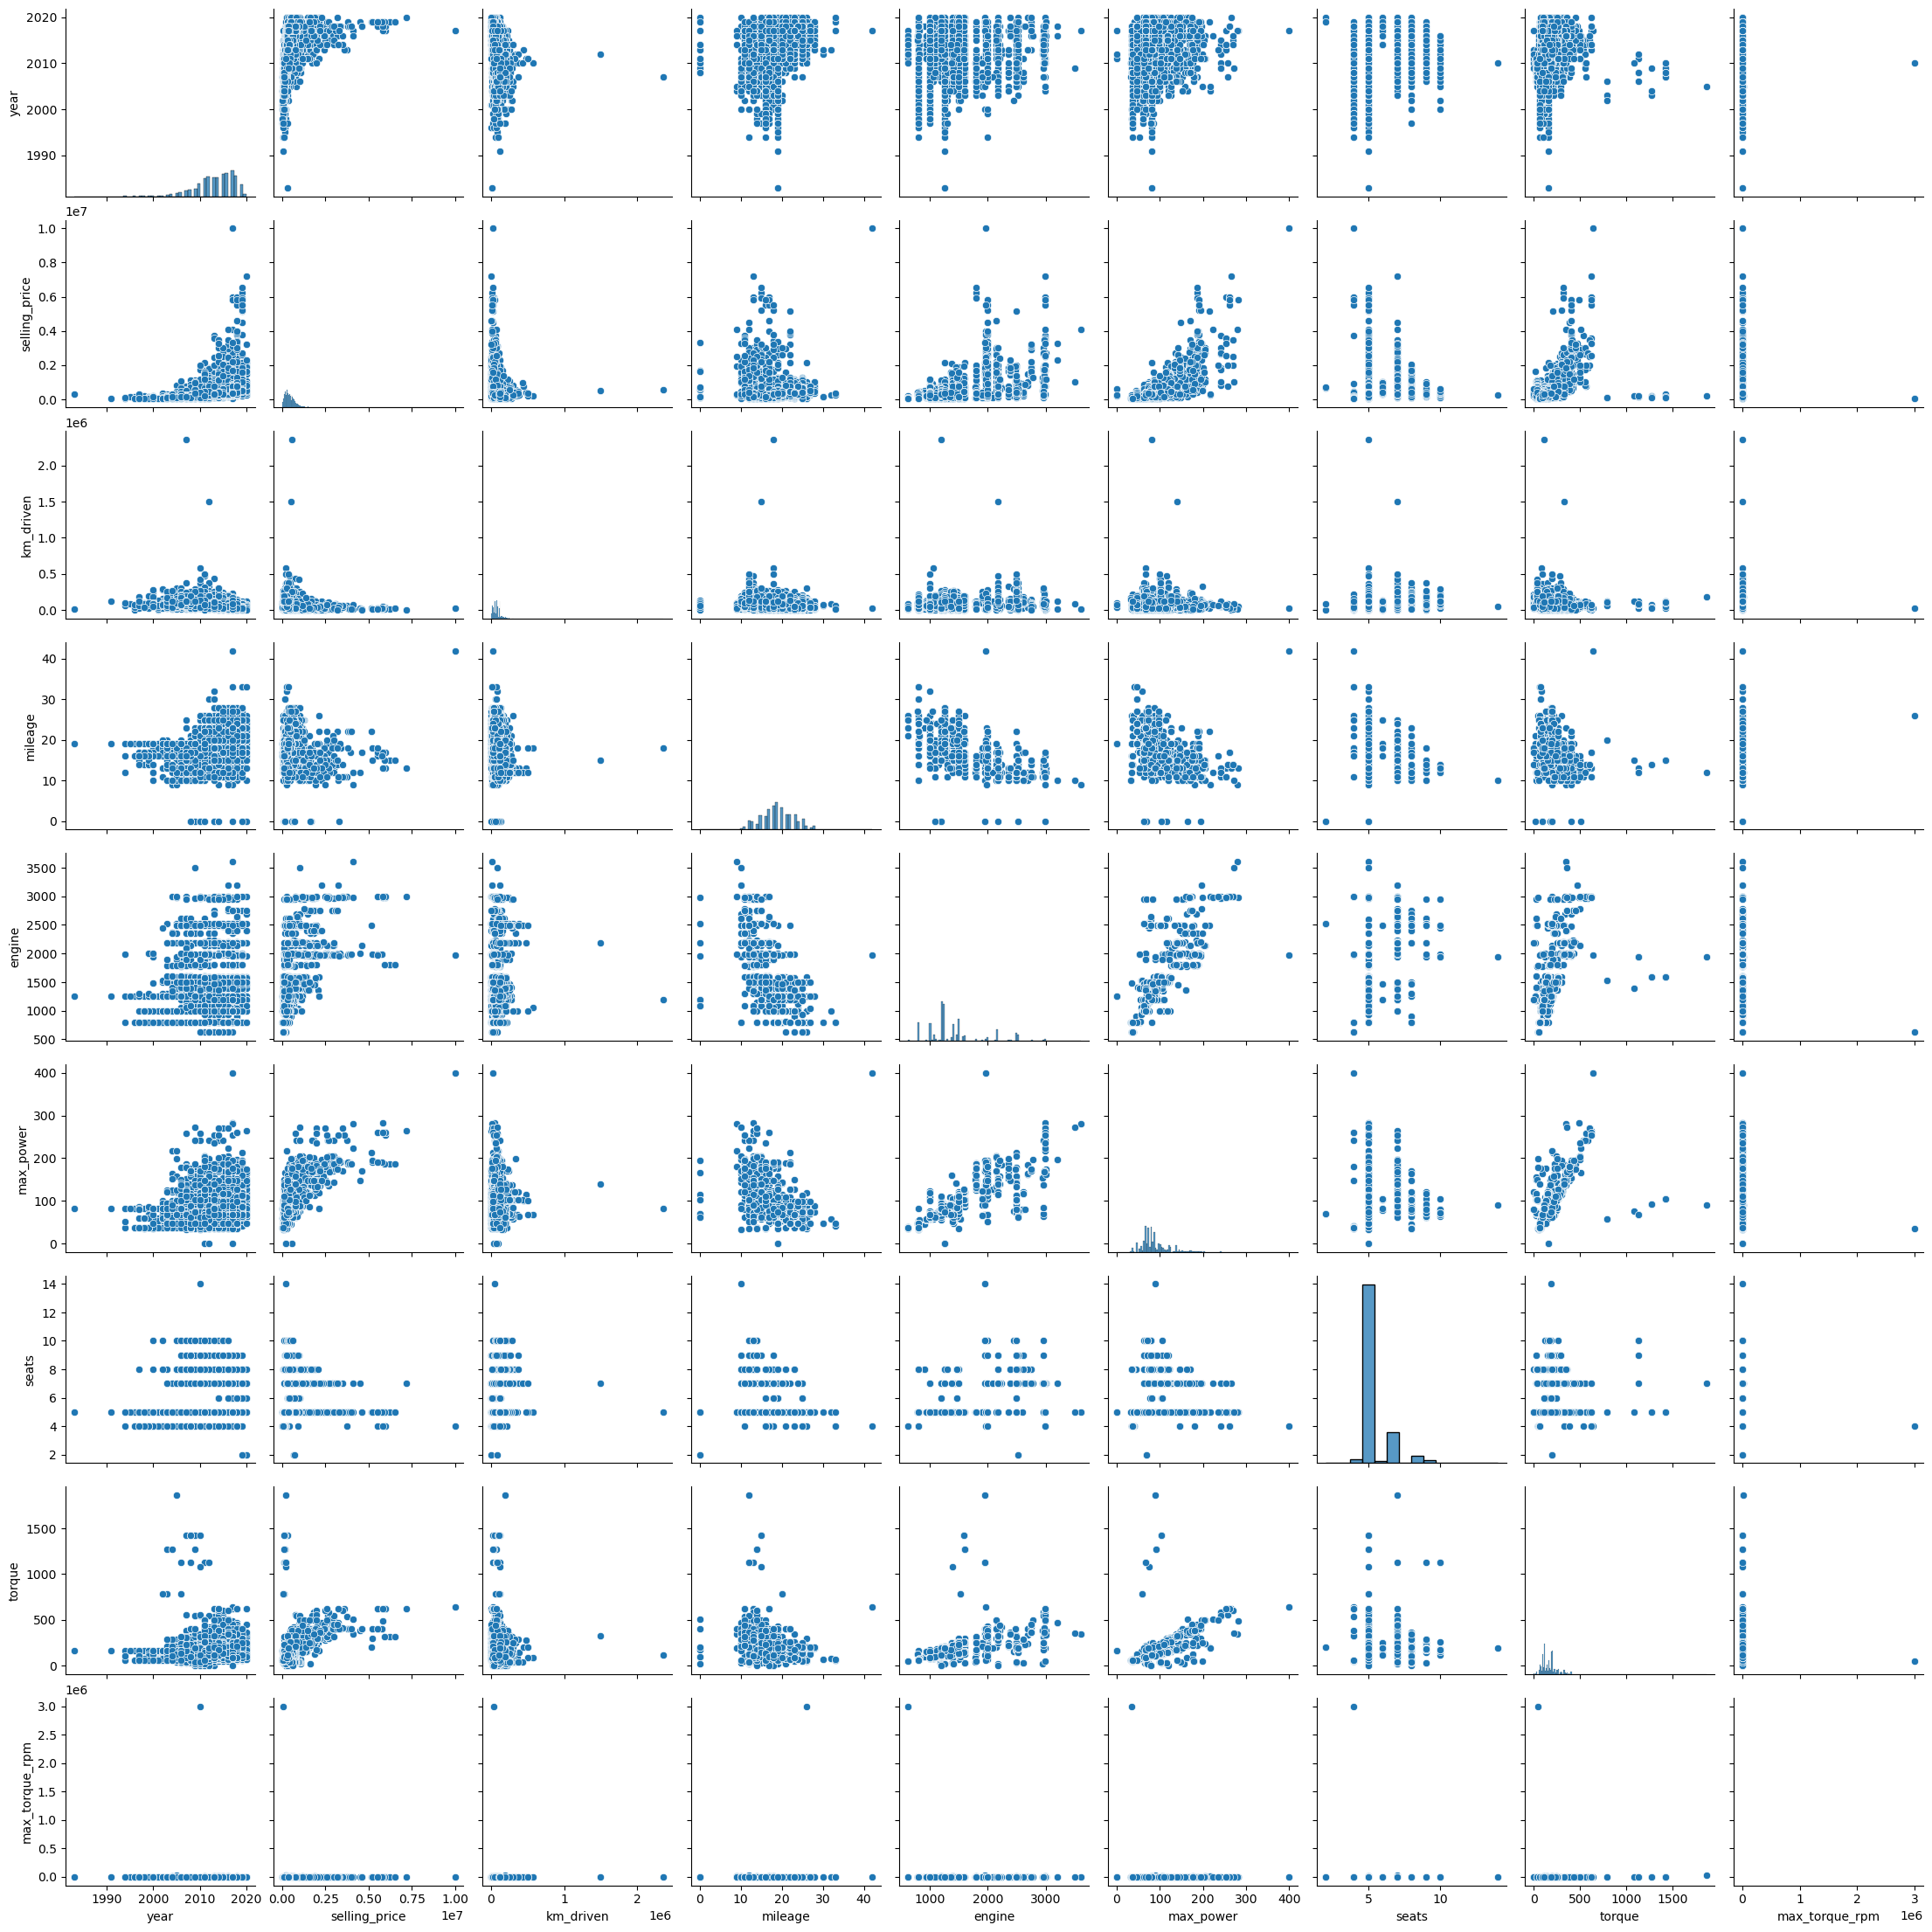

In [26]:
import seaborn as sns
sns.pairplot(df_train)
plt.show()

По данным графикам нельзя предположить о линейной связи между целевой переменной и остальными переменными.

чем больше объем двигателя, тем больше мощность (engine, max_power), однако по остальным не могу сказать, что есть зависимости.

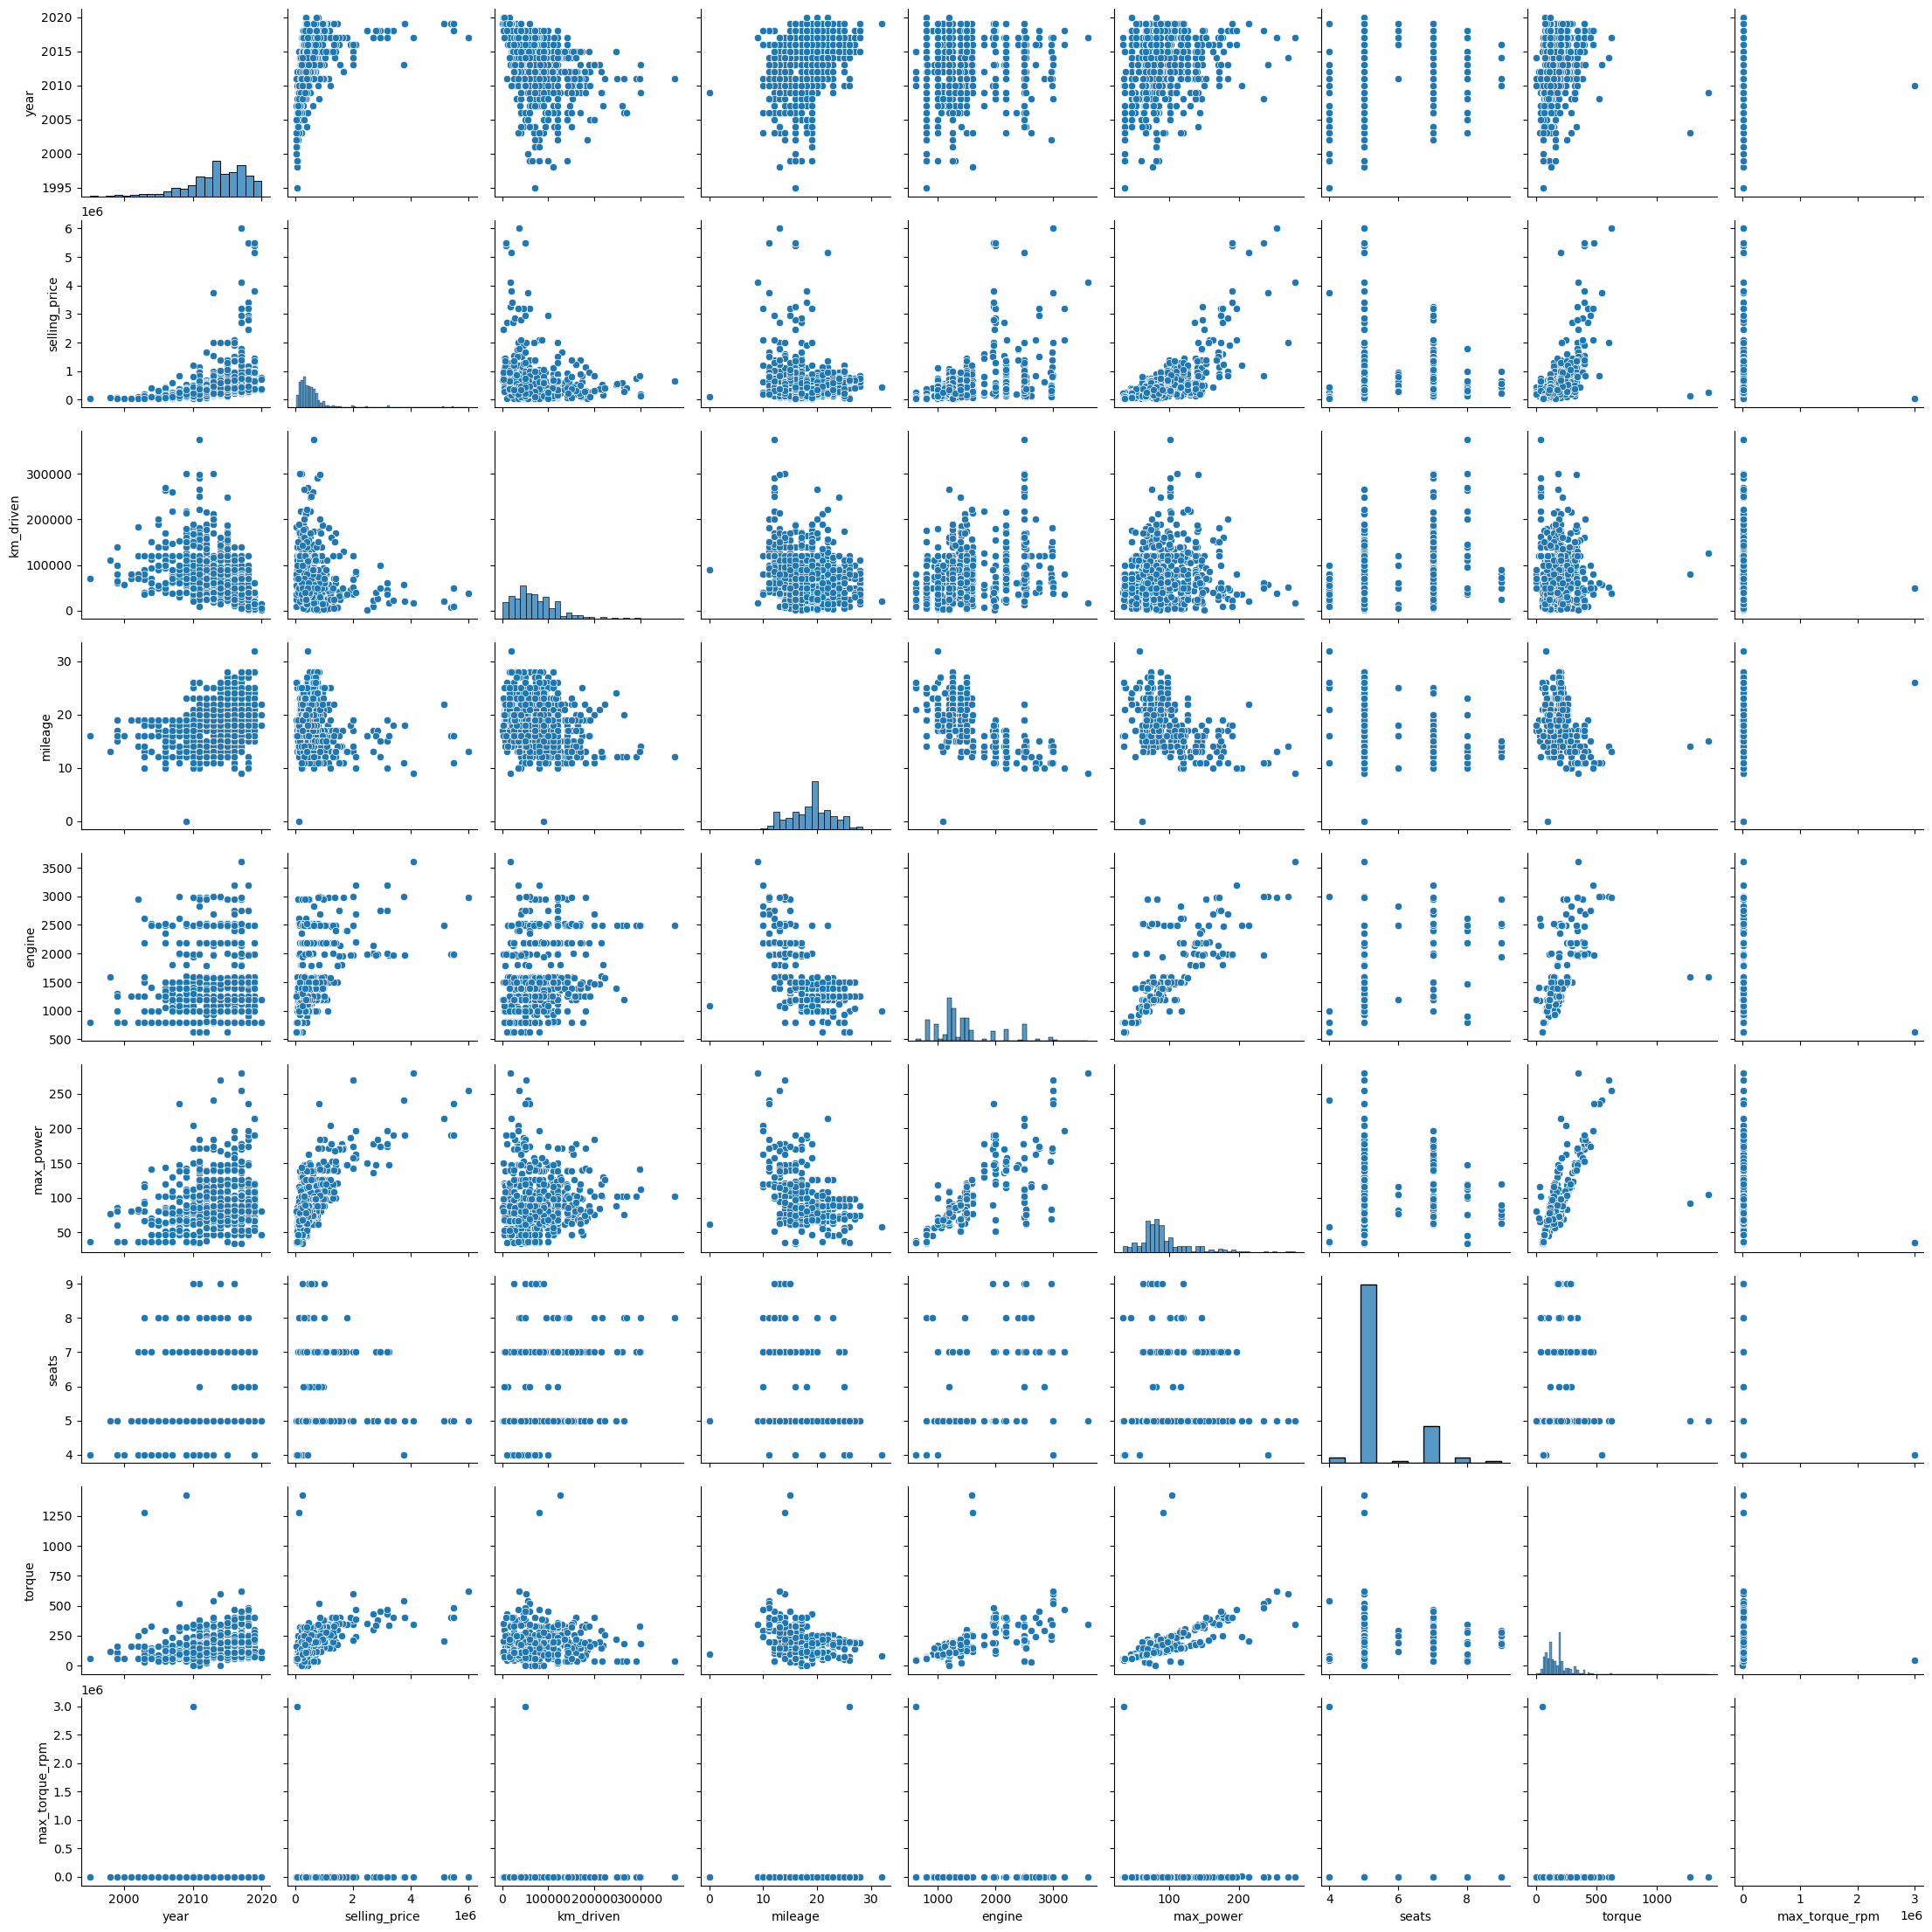

In [28]:
sns.pairplot(df_test)
plt.show()

Между тестовой и тренировочной выборкой различается в основном распределение для km_driven и остальных столбцов

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

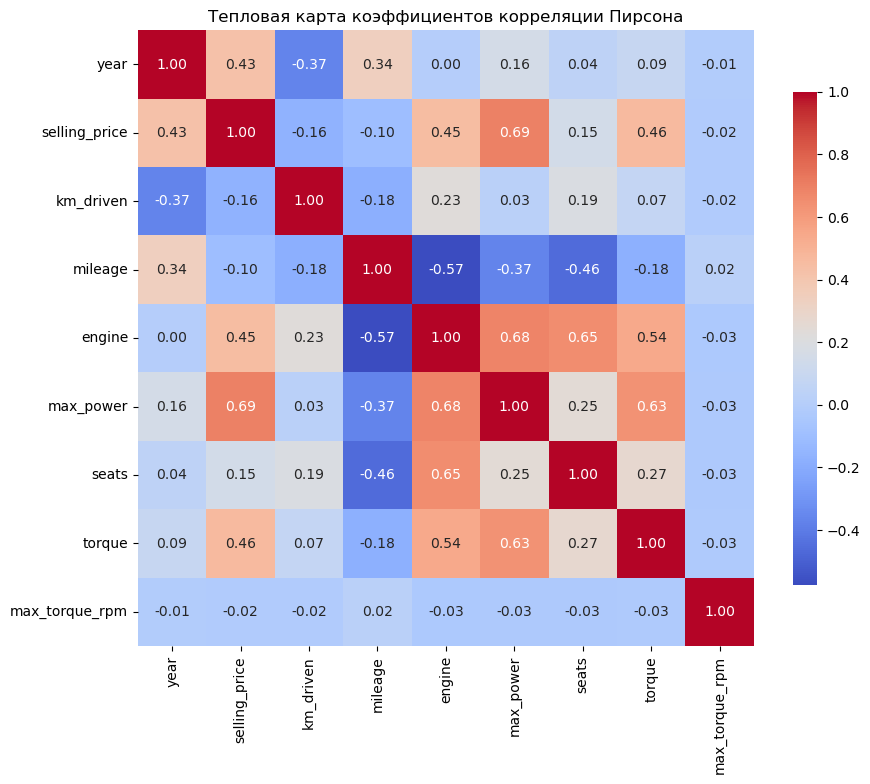

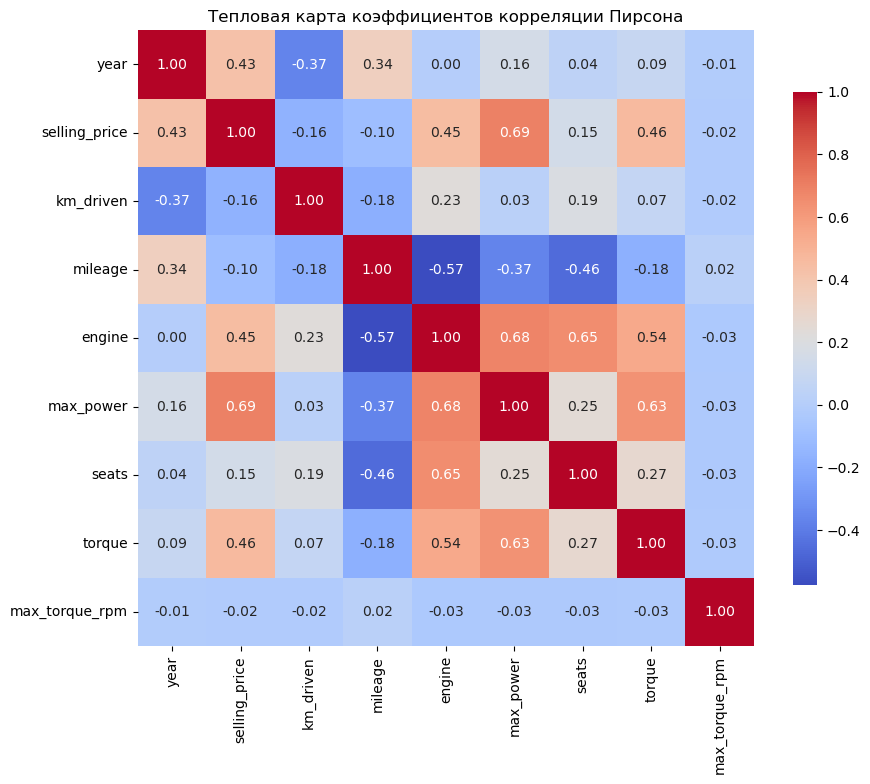

In [30]:
num_data = df_train.select_dtypes(include=['number'])
correlation_matrix = num_data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Тепловая карта коэффициентов корреляции Пирсона')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. max_torque_rpm/year
2. engine/max_power, seats/engine, selling_price/max_power
3. Между year/km_driven не очень большая корреляция, поэтому наверное нет.

`Your answer here`

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [43]:
def kendall_correlation(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    
    n = len(x)
    i, j = np.triu_indices(n, k=1)
    concordant = np.sum((x[i] - x[j]) * (y[i] - y[j]) > 0)
    discordant = np.sum((x[i] - x[j]) * (y[i] - y[j]) < 0)
    kendall_corr = (concordant - discordant) / (0.5 * n * (n - 1))
    
    return kendall_corr


In [45]:
!pip install phik

     ------------------------------------ 666.3/666.3 kB 591.6 kB/s eta 0:00:00


In [44]:
from scipy.stats import kendalltau

n_vars = len(num_data.columns)


for i in range(n_vars):
    for j in range(i+1, n_vars):
        x = num_data.iloc[:, i]
        y = num_data.iloc[:, j]
        kendall_manual = kendall_correlation(x, y)
        kendall_library, _ = kendalltau(x, y)
        print(f'{num_data.columns[i]} and {num_data.columns[j]}')
        print(f'Корреляция Кендалла (ручная): {kendall_manual:.4f}, библиотечная: {kendall_library:.4f}')


year and selling_price
Корреляция Кендалла (ручная): 0.5150, библиотечная: 0.5387
year and km_driven
Корреляция Кендалла (ручная): -0.3979, библиотечная: -0.4205
year and mileage
Корреляция Кендалла (ручная): 0.2335, библиотечная: 0.2525
year and engine
Корреляция Кендалла (ручная): -0.0270, библиотечная: -0.0289
year and max_power
Корреляция Кендалла (ручная): 0.1132, библиотечная: 0.1198
year and seats
Корреляция Кендалла (ручная): 0.0220, библиотечная: 0.0385
year and torque
Корреляция Кендалла (ручная): 0.1103, библиотечная: 0.1163
year and max_torque_rpm
Корреляция Кендалла (ручная): -0.0399, библиотечная: -0.0433
selling_price and km_driven
Корреляция Кендалла (ручная): -0.1970, библиотечная: -0.2010
selling_price and mileage
Корреляция Кендалла (ручная): 0.0317, библиотечная: 0.0331
selling_price and engine
Корреляция Кендалла (ручная): 0.3231, библиотечная: 0.3342
selling_price and max_power
Корреляция Кендалла (ручная): 0.4459, библиотечная: 0.4556
selling_price and seats
Корр

Корреляция Кендалла средне значима у след переменных: max_power and max_torque_rpm, year and km_driven, engine and max_torque_rpm

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']
interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']


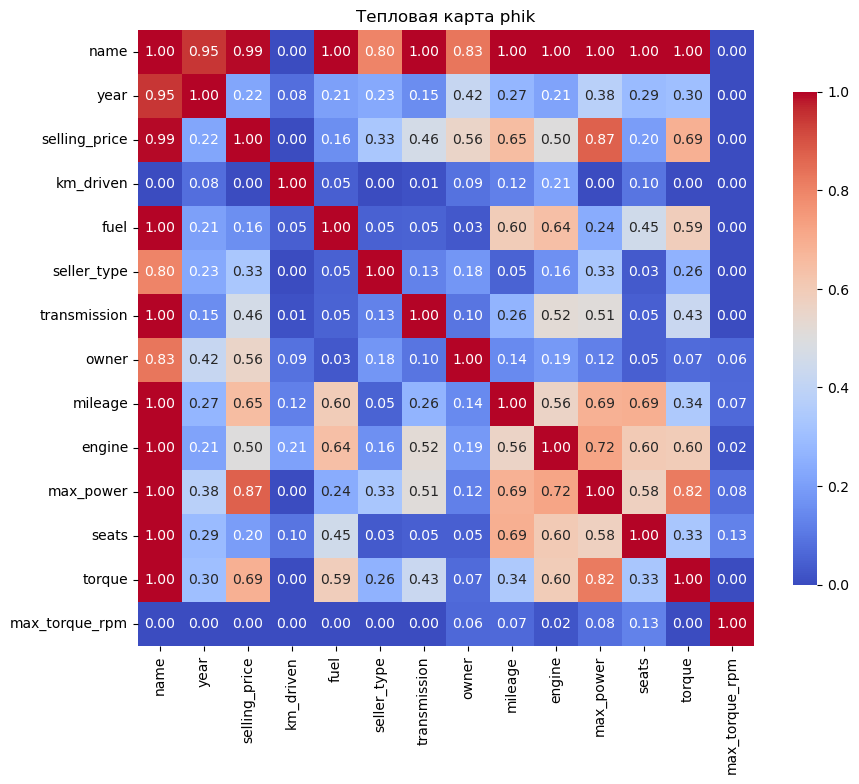

In [47]:
import phik
df_train.phik_matrix()
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.phik_matrix(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Тепловая карта phik')
plt.show()

Довольно таки странная высокая корреляция между переменной name и всеми остальными переменными особенно когда значение равно 1, видимо из-за того что имен очень много и каждое принимает за отдельно высококореллируемуе значение!

In [48]:
df_train.phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']


name      year  selling_price  km_driven      fuel  \
name            1.000000  0.948995       0.994871   0.000000  1.000000   
year            0.948995  1.000000       0.219841   0.081574  0.205834   
selling_price   0.994871  0.219841       1.000000   0.000000  0.157885   
km_driven       0.000000  0.081574       0.000000   1.000000  0.046285   
fuel            1.000000  0.205834       0.157885   0.046285  1.000000   
seller_type     0.799127  0.232412       0.334505   0.000000  0.050771   
transmission    1.000000  0.153714       0.463058   0.012824  0.053721   
owner           0.830098  0.418636       0.557641   0.087887  0.030943   
mileage         0.999398  0.271224       0.649109   0.124864  0.596152   
engine          1.000000  0.213156       0.503682   0.210747  0.644421   
max_power       0.997870  0.378587       0.871639   0.000000  0.238285   
seats           0.999985  0.288178       0.196447   0.096223  0.450714   
torque          0.999965  0.301933       0.689073   0.000000  0.588452   
max_torque_rpm  0.000000  0.000000       0.000000   0.000000  0.000000   

                seller_type  transmission     owner   mileage    engine  \
name               0.799127      1.000000  0.830098  0.999398  1.000000   
year               0.232412      0.153714  0.418636  0.271224  0.213156   
selling_price      0.334505      0.463058  0.557641  0.649109  0.503682   
km_driven          0.000000      0.012824  0.087887  0.124864  0.210747   
fuel               0.050771      0.053721  0.030943  0.596152  0.644421   
seller_type        1.000000      0.127968  0.176612  0.053118  0.160346   
transmission       0.127968      1.000000  0.096990  0.261965  0.520161   
owner              0.176612      0.096990  1.000000  0.144996  0.186011   
mileage            0.053118      0.261965  0.144996  1.000000  0.559450   
engine             0.160346      0.520161  0.186011  0.559450  1.000000   
max_power          0.331947      0.510015  0.121376  0.686103  0.721299   
seats              0.032173      0.045734  0.046741  0.693727  0.603400   
torque             0.261325      0.429309  0.071310  0.343965  0.596883   
max_torque_rpm     0.000000      0.000000  0.064825  0.067763  0.021691   

                max_power     seats    torque  max_torque_rpm  
name             0.997870  0.999985  0.999965        0.000000  
year             0.378587  0.288178  0.301933        0.000000  
selling_price    0.871639  0.196447  0.689073        0.000000  
km_driven        0.000000  0.096223  0.000000        0.000000  
fuel             0.238285  0.450714  0.588452        0.000000  
seller_type      0.331947  0.032173  0.261325        0.000000  
transmission     0.510015  0.045734  0.429309        0.000000  
owner            0.121376  0.046741  0.071310        0.064825  
mileage          0.686103  0.693727  0.343965        0.067763  
engine           0.721299  0.603400  0.596883        0.021691  
max_power        1.000000  0.575206  0.818655        0.080520  
seats            0.575206  1.000000  0.330249        0.128366  
torque           0.818655  0.330249  1.000000        0.000000  
max_torque_rpm   0.080520  0.128366  0.000000        1.000000

`Your answer here`

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

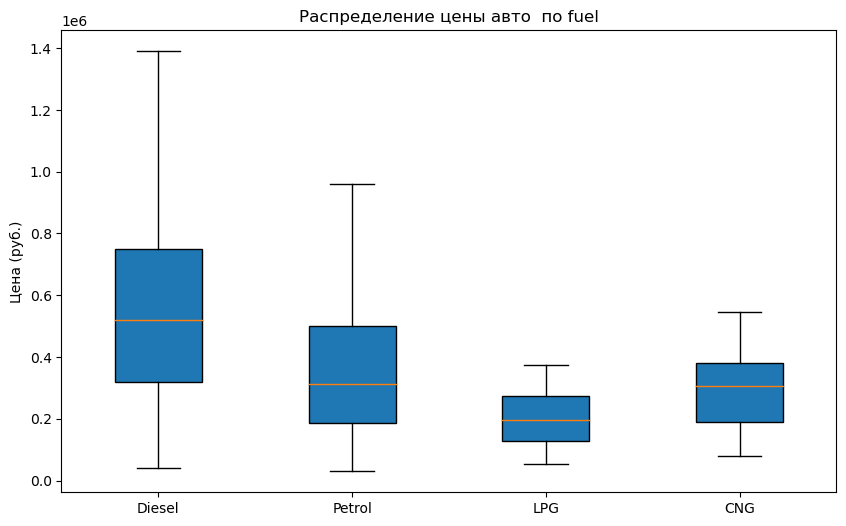

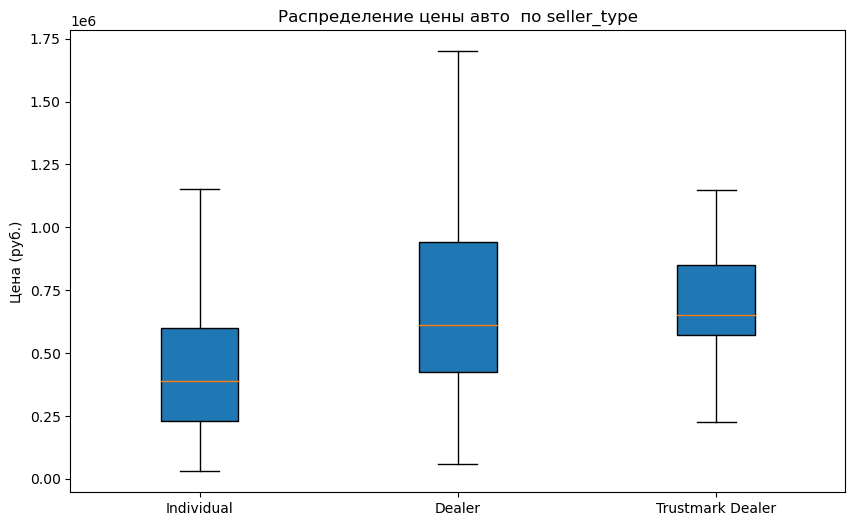

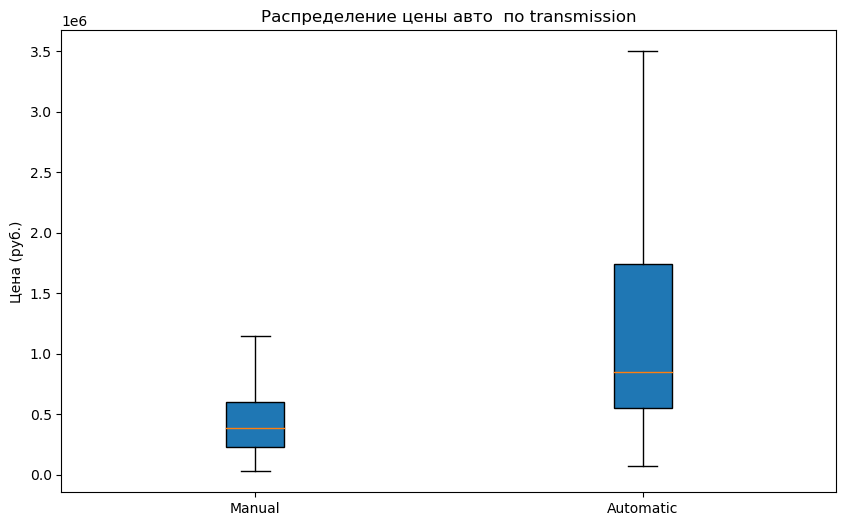

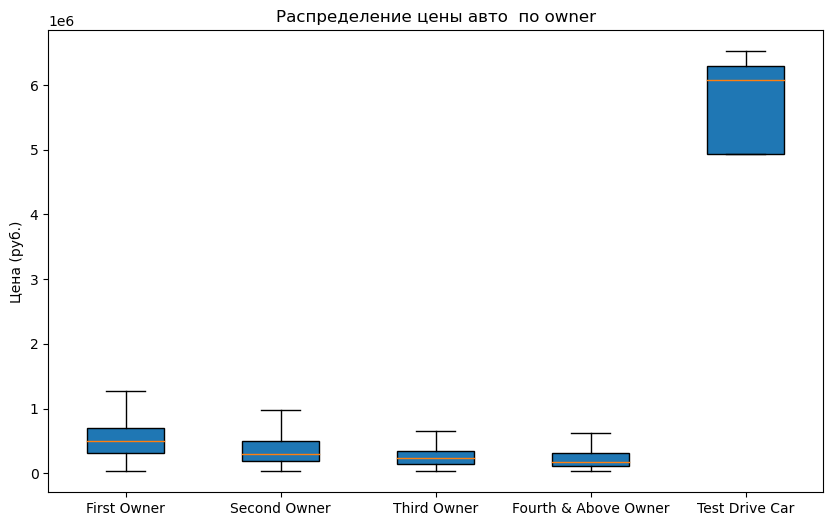

In [55]:
df_cat = df_train.select_dtypes(include=['object'])
for col in df_cat.drop('name', axis=1).columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(
      x=[df_train['selling_price'][df_train[col] == exp] for exp in df_train[col].unique()],
      labels=df_train[col].unique(),
      patch_artist=True,
      showfliers=False
    )
    plt.title(f'Распределение цены авто  по {col}')
    plt.ylabel('Цена (руб.)')
    plt.show()

Довольно таки значимые графики, по ним можно понять, что:
- [ ] owner (Test drive car) - автомобили из автосалона, соответственно новые и с высокой ценной.
- [ ] машины дороже 1.5 миллиона практически все на автомате
- [ ] у диллеров цены в среднем дороже, чем у индивидуальных продавцов
- [ ]  машины с дизельным топливом, тоже в среднем дороже и более дорогие машины в большей степени на дизеле

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [25]:
df_numeric_train = df_train.select_dtypes(include='number')
df_numeric_test = df_test.select_dtypes(include='number')
df_numeric_train  = df_numeric_train.drop(['max_torque_rpm', 'mileage'], axis=1)
df_numeric_test = df_numeric_test.drop(['max_torque_rpm', 'mileage'], axis=1)

Иначе не совпадает число столбцов с нужны, удалил самые некоррелируемые числовые признаки с ценной

In [27]:
y_train = df_numeric_train['selling_price']
X_train = df_numeric_train.drop(['selling_price'], axis=1)

In [28]:
assert X_train.shape == (5840, 6)

In [29]:
y_test = df_numeric_test['selling_price']
X_test = df_numeric_test.drop(['selling_price'], axis=1)

In [30]:
assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred1 = model.predict(X_train)
y_test_pred1 = model.predict(X_test)

train_mse = MSE(y_train, y_train_pred1)
test_mse = MSE(y_test, y_test_pred1)
train_r2 = r2_score(y_train, y_train_pred1)
test_r2 = r2_score(y_test, y_test_pred1)

print(f'Обучающая выборка: MSE = {train_mse:.2f}, R² = {train_r2:.2f}')
print(f'Тестовая выборка: MSE = {test_mse:.2f}, R² = {test_r2:.2f}')

Обучающая выборка: MSE = 116842835605.71, R² = 0.59
Тестовая выборка: MSE = 232623405771.11, R² = 0.60


По MSE тяжело сделать выводы, лучше использовать RMSE, однако можно сказать, что ошибка весьма значимая около 350 тысяч на трейне и 480 на тесте, что очень велико, и к тому же велика разница между трейном и тестом, модель могла переобучиться

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [63]:
def r_squared(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    SS_res = np.sum((y_true - y_pred) ** 2)
    SS_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (SS_res / SS_tot)   
    return r2

In [64]:
train_r2 = r_squared(y_train, y_train_pred)
test_r2 = r_squared(y_test, y_test_pred)

print(f'Обучающая выборка: R² = {train_r2:.2f}')
print(f'Тестовая выборка: R² = {test_r2:.2f}')

Обучающая выборка: R² = 0.59
Тестовая выборка: R² = 0.60


$R^2$ = $1 - SSres/SStot$

$SSres$ - сумма квадратов остатков регрессии,
$SStot$ - сумма квадратов общей вариации,
$Ytrue$ - реальная переменная,
$Ypred$ - пердсказанная переменная,

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [359]:
def adjusted_r_squared(r_squared, X): 
    n = X.shape[0]
    p = X.shape[1] - 1 
    return 1 - (1 - r_squared) * (n - 1) / (n - p - 1)


`При сравнении нескольких моделей с различным количеством предикторов скорректированный R^2 2
  позволяет выбрать модель, которая дает лучшее объяснение вариации зависимой переменной, не увеличивая количество предикторов без необходи, кроме того скорректированный R^2 2
  помогает оценить, насколько хорошо модель объясняет вариацию зависимой переменной, принимая во внимание количество предикторов. Он более надежен, чем обыR^2
R 
2
 , поскольку учитывает количество предикторов в модели.мости`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_model = LinearRegression()
new_model.fit(X_train_scaled, y_train)

y_train_pred2 = new_model.predict(X_train_scaled)
y_test_pred2 = new_model.predict(X_test_scaled)

train_mse = MSE(y_train, y_train_pred2)
test_mse = MSE(y_test, y_test_pred2)
train_r2 = r2_score(y_train, y_train_pred2)
test_r2 = r2_score(y_test, y_test_pred2)

print(f'Обучающая выборка: MSE = {train_mse:.2f}, R² = {train_r2:.2f}')
print(f'Тестовая выборка: MSE = {test_mse:.2f}, R² = {test_r2:.2f}')


Обучающая выборка: MSE = 116842835605.71, R² = 0.59
Тестовая выборка: MSE = 232623405771.11, R² = 0.60


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [71]:
coefficients = new_model.coef_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)
importance_df

Feature    Coefficient  Absolute Coefficient
3  max_power  306032.237975         306032.237975
0       year  164610.464191         164610.464191
2     engine   45890.174964          45890.174964
1  km_driven  -41878.511030          41878.511030
4      seats  -30528.953738          30528.953738
5     torque   25904.099396          25904.099396

Самым информативным оказался признак мощности - кол л.с

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [94]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

y_train_pred_l = lasso.predict(X_train_scaled)
y_test_pred_l = lasso.predict(X_test_scaled)

train_mse = MSE(y_train, y_train_pred_l)
test_mse = MSE(y_test, y_test_pred_l)
train_r2 = r2_score(y_train, y_train_pred_l)
test_r2 = r2_score(y_test, y_test_pred_l)

print(f'Обучающая выборка: MSE = {train_mse:.2f}, R² = {train_r2:.2f}')
print(f'Тестовая выборка: MSE = {test_mse:.2f}, R² = {test_r2:.2f}')

Обучающая выборка: MSE = 116842835613.02, R² = 0.59
Тестовая выборка: MSE = 232624049765.32, R² = 0.60


In [35]:
coefficients = lasso.coef_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)
importance_df

Feature    Coefficient  Absolute Coefficient
3  max_power  306033.556676         306033.556676
0       year  164609.527957         164609.527957
2     engine   45886.658614          45886.658614
1  km_driven  -41877.650824          41877.650824
4      seats  -30525.893037          30525.893037
5     torque   25903.353269          25903.353269

L1 никакие веса не занулила, и метрики в целом не изменились, однако коэффициенты видно, что поменялись. L1-регуляризация может не занулить коэффициенты, поскольку все признаки могут вносить полезный вклад в предсказание

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [90]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

param_grid = {
    'alpha': np.logspace(-4, 1, 10),  # Значения параметра регуляризации
}
lasso = Lasso()
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
y_pred_l = grid_search.predict(X_test)
mse = MSE(y_test, y_pred_l)
r2 = r2_score(y_test, y_pred_l)

print("Лучший параметр alpha:", grid_search.best_params_['alpha'])
print("Наилучшая модель:", grid_search.best_estimator_)
print("MSE лучшего значения:", mse)
print("R² лучшего значения:", r2)

Лучший параметр alpha: 0.0001
Наилучшая модель: Lasso(alpha=0.0001)
MSE лучшего значения: 232623405787.1091
R² лучшего значения: 0.5953168931756679
Wall time: 430 ms


In [42]:
grid_search.best_estimator_.coef_

array([ 4.01952528e+04, -6.97208334e-01,  9.44978719e+01,  9.68071397e+03,
       -3.10803234e+04,  2.38325342e+02])

Веса не занулились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [91]:
%%time
param_grid = {
    'alpha': np.logspace(-4, 1, 10),  # Значения параметра регуляризации
    'l1_ratio': np.linspace(0, 1, 10)  # Пропорция L1 в регуляризации
}
elastic_net = ElasticNet()
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
y_pred_e = grid_search.predict(X_test)
mse = MSE(y_test, y_pred_e)
r2 = r2_score(y_test, y_pred_e)

print("Лучший параметр alpha:", grid_search.best_params_['alpha'])
print("Лучший параметр l1_ratio:", grid_search.best_params_['l1_ratio'])
print("Наилучшая модель:", grid_search.best_estimator_)
print("MSE лучшего значения:", mse)
print("R² лучшего значения:", r2)

Лучший параметр alpha: 0.0001
Лучший параметр l1_ratio: 1.0
Наилучшая модель: ElasticNet(alpha=0.0001, l1_ratio=1.0)
MSE лучшего значения: 232623405787.1091
R² лучшего значения: 0.5953168931756679
Wall time: 6.14 s


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [87]:
X_train_cat = df_train.drop(['selling_price','max_torque_rpm', 'mileage'], axis=1)
X_test_cat = df_test.drop(['selling_price','max_torque_rpm', 'mileage'], axis=1)

In [88]:
assert X_train_cat.shape == (5840, 11)

In [89]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

Кодирование по частоте. Неплохо работает, если уникальных значений много

In [90]:
X_train_cat = X_train_cat.drop(['name'], axis=1)
X_test_cat = X_test_cat.drop(['name'], axis=1)

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [91]:
encoder = OneHotEncoder(sparse_output=False)

X_encoded = encoder.fit_transform(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
encoded_feature_names = encoder.get_feature_names_out(['fuel', 'seller_type', 'transmission', 'owner', 'seats'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_train_cat = X_train_cat.drop(['fuel', 'seller_type', 'transmission', 'owner', 'seats'], axis=1)
X_train_cat = pd.concat([X_train_cat, X_encoded_df], axis=1)

In [92]:
X_encoded = encoder.transform(X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
encoded_feature_names = encoder.get_feature_names_out(['fuel', 'seller_type', 'transmission', 'owner', 'seats'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_test_cat = X_test_cat.drop(['fuel', 'seller_type', 'transmission', 'owner', 'seats'], axis=1)
X_test_cat = pd.concat([X_test_cat, X_encoded_df], axis=1)

In [93]:
X_test_cat

year  km_driven  engine  max_power  torque  fuel_CNG  fuel_Diesel  \
0    2010     168000    2498      112.0  180.00       0.0          1.0   
1    2017      25000    1497      108.0  260.00       0.0          1.0   
2    2007     218463    1799      130.0  172.00       0.0          0.0   
3    2015     173000    1498       98.0  200.00       0.0          1.0   
4    2011      70000    1172       65.0   30.00       0.0          0.0   
..    ...        ...     ...        ...     ...       ...          ...   
995  2008     100000    1086       68.0   99.04       0.0          0.0   
996  2017      50000    1197       81.0  114.70       0.0          0.0   
997  2009      40000    1396       90.0  175.00       0.0          1.0   
998  2012      25000    1197       78.0  111.80       0.0          0.0   
999  2016     110000    1498       98.0  200.00       0.0          1.0   

     fuel_LPG  fuel_Petrol  seller_type_Dealer  ...  owner_Third Owner  \
0         0.0          0.0                 0.0  ...                0.0   
1         0.0          0.0                 0.0  ...                0.0   
2         0.0          1.0                 0.0  ...                0.0   
3         0.0          0.0                 0.0  ...                0.0   
4         0.0          1.0                 0.0  ...                0.0   
..        ...          ...                 ...  ...                ...   
995       0.0          1.0                 0.0  ...                0.0   
996       0.0          1.0                 0.0  ...                0.0   
997       0.0          0.0                 0.0  ...                0.0   
998       0.0          1.0                 0.0  ...                0.0   
999       0.0          0.0                 0.0  ...                0.0   

     seats_2  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  seats_10  \
0        0.0      0.0      0.0      0.0      1.0      0.0      0.0       0.0   
1        0.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
2        0.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
3        0.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
4        0.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
..       ...      ...      ...      ...      ...      ...      ...       ...   
995      0.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
996      0.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
997      0.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
998      0.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
999      0.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   

     seats_14  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
..        ...  
995       0.0  
996       0.0  
997       0.0  
998       0.0  
999       0.0  

[1000 rows x 28 columns]

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1.One-Hot Encoding преобразует категориальные переменные в набор бинарных признаков (0 и 1), где каждый уникальный уровень становится отдельным столбцом. Таким образом корректно работать с OHE преобразованием, тогда когда у нас не много уникальных значений, чтобы не сделать огромное признаковое пространство и не ухудшить нашу модель

2.При использовании OHE мы часто удаляем один из полученных столбцов, чтобы избежать проблемы мультиколлинеарности. Мультиколлинеарность может возникнуть, когда все переменные (в данном случае - бинарные столбцы) могут быть идеально описаны с использованием других переменных. 

3.Если вы удалите неважные признаки, необходимо убедиться, что это не приведет к потере важной информации - особой зависимости между другими признаками.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error as MSE

ridge = Ridge(alpha=1.0)
#scoring=scorer
param_grid = {'alpha': np.logspace(-4, 1, 10)}

scorer = make_scorer(r2_score)
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10)

grid_search.fit(X_train_cat, y_train)
y_pred = grid_search.predict(X_test_cat)
mse = MSE(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Лучший параметр alpha:", grid_search.best_params_['alpha'])
print("Наилучшая модель:", grid_search.best_estimator_)
print("MSE лучшего значения:", mse)
print("R² лучшего значения:", r2)

Лучший параметр alpha: 10.0
Наилучшая модель: Ridge(alpha=10.0)
MSE лучшего значения: 203662725523.97925
R² лучшего значения: 0.6456983155651039


In [67]:
import pickle
model_data = {
    'weights': grid_search.best_estimator_.coef_,
    'intercept': grid_search.best_estimator_.intercept_,
    'encoder' : encoder
}

with open('model_data.pickle', 'wb') as f:
    pickle.dump(model_data, f)

Качество удалось улучшить, однако используя pd.get_dummies следует быть осторожным и проверять соответствие столбцов в тесте и трейне.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

- [ ] y_test_pred1  base linearregression
- [ ] y_test_pred2 linearregression with Standardscaler
- [ ] y_test_pred_l lasso base
- [ ] y_pred_l gridsearch lasso
- [ ] y_pred_e gridsearch elasticnet
- [ ] y_test gridsearch ridge with category

In [97]:
def business_metrics(y_true, y_pred):
    tolerance = np.abs(y_pred - y_true) <= (0.1 * y_true)
    return np.sum(tolerance) / len(y_true)

print(business_metrics(y_test, y_test_pred1))
print(business_metrics(y_test, y_test_pred2))
print(business_metrics(y_test, y_test_pred_l))
print(business_metrics(y_test, y_pred_l))
print(business_metrics(y_test, y_pred_e))
print(business_metrics(y_test, y_pred))


0.222
0.222
0.222
0.222
0.222
0.224


gridsearch ridge with category the best!!! Категориальные признаки сильно приблежают предсказанную цену к реальной, правда не очень сильно

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Для создания кастомной метрики, которая учитывает предпочтение бизнеса к недопрогнозам и перепрогнозам, мы можем рассмотреть ситуацию, в которой недопрогноз считается более серьезной ошибкой, чем перепрогноз. Это может быть полезно в различных бизнес-сценариях

In [98]:
def your_business_metrics(y_true, y_pred):
    """
    Вычисляет взвешенную среднюю абсолютную ошибку (WMAE).
    :param y_true: Фактические значения (numpy array или list).
    :param y_pred: Предсказанные значения (numpy array или list).
    :return: WMAE
    """
    
    weights = np.where(y_pred < y_true, 2, 1)  # 2 для недопрогноза, 1 для перепрогноза

    absolute_errors = np.abs(y_true - y_pred)
    wmae = np.mean(weights * absolute_errors)
    return wmae

print(your_business_metrics(y_test, y_test_pred1))
print(your_business_metrics(y_test, y_test_pred2))
print(your_business_metrics(y_test, y_test_pred_l))
print(your_business_metrics(y_test, y_pred_l))
print(your_business_metrics(y_test, y_pred_e))
print(your_business_metrics(y_test, y_pred))

363083.61248186126
363083.61248186795
363083.3215511681
363083.61246763304
363083.61246763304
354479.6767718247


gridsearch ridge with category - наилучший резуультат. Категориальные признаки сильно приблежают предсказанную цену к реальной, правда не очень сильно, средняя ошибка в цене из-за этого упала

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>